In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('listings.csv')
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


# Data cleaning

In [3]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)
data['host_is_superhost'] = data['host_is_superhost'].fillna('f')
data['host_listings_count'] = data['host_listings_count'].fillna(0)
data['host_total_listings_count'] = data['host_total_listings_count'].fillna(0)
data['bathrooms'] = data['bathrooms'].fillna(0)
data['bedrooms'] = data['bedrooms'].fillna(0)
data['beds'] = data['beds'].fillna(0)
data['review_scores_rating'] = data['review_scores_rating'].fillna(0)
data['review_scores_accuracy'] = data['review_scores_accuracy'].fillna(0)
data['review_scores_cleanliness'] = data['review_scores_cleanliness'].fillna(0)
data['review_scores_checkin'] = data['review_scores_checkin'].fillna(0)
data['review_scores_communication'] = data['review_scores_communication'].fillna(0)
data['review_scores_location'] = data['review_scores_location'].fillna(0)
data['review_scores_value'] = data['review_scores_value'].fillna(0)
data['price'] = data['price'].fillna(0)
data['weekly_price'] = data['weekly_price'].fillna(0)
data['monthly_price'] = data['monthly_price'].fillna(0)
data['security_deposit'] = data['security_deposit'].fillna(0)
data['cleaning_fee'] = data['cleaning_fee'].fillna(0)
data['extra_people'] = data['extra_people'].fillna(0)
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')
data['weekly_price'] = data['weekly_price'].str.replace('$', '')
data['weekly_price'] = data['weekly_price'].str.replace(',', '')
data['monthly_price'] = data['monthly_price'].str.replace('$', '')
data['monthly_price'] = data['monthly_price'].str.replace(',', '')
data['security_deposit'] = data['security_deposit'].str.replace('$', '')
data['security_deposit'] = data['security_deposit'].str.replace(',', '')
data['cleaning_fee'] = data['cleaning_fee'].str.replace('$', '')
data['cleaning_fee'] = data['cleaning_fee'].str.replace(',', '')
data['extra_people'] = data['extra_people'].str.replace('$', '')
data['extra_people'] = data['extra_people'].str.replace(',', '')
data['price'] = data['price'].astype(float)
data['weekly_price'] = data['weekly_price'].astype(float)
data['monthly_price'] = data['monthly_price'].astype(float)
data['security_deposit'] = data['security_deposit'].astype(float)
data['cleaning_fee'] = data['cleaning_fee'].astype(float)
data['extra_people'] = data['extra_people'].astype(float)


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [5]:
data['Price/Accomodates'] = data['price'] / data['accommodates']

In [6]:
data['Price/Accomodates'].head()


0    21.250000
1    37.500000
2    88.636364
3    33.333333
4    75.000000
Name: Price/Accomodates, dtype: float64

In [7]:
data.to_csv(r'File Name.csv', index = False)

In [8]:
data['weekly_price'].head()

0       NaN
1    1000.0
2       NaN
3     650.0
4       NaN
Name: weekly_price, dtype: float64

In [9]:
data['weekly_price'] = data['weekly_price'].fillna(0)

In [10]:
data['weekly_price'].head()

0       0.0
1    1000.0
2       0.0
3     650.0
4       0.0
Name: weekly_price, dtype: float64

In [11]:
data['monthly_price'] = data['monthly_price'].fillna(0)
data['security_deposit'] = data['security_deposit'].fillna(0)
data['cleaning_fee'] = data['cleaning_fee'].fillna(0)

In [12]:
data['monthly_price'].head()

0       0.0
1    3000.0
2       0.0
3    2300.0
4       0.0
Name: monthly_price, dtype: float64

# Linear regression checking beween laitude and price

In [13]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier


In [14]:
price = pd.DataFrame(data['price'])  # Response
location = pd.DataFrame(data['latitude'])        # Predictor

In [15]:
# Train Set : 600 samples
price_train = pd.DataFrame(price[:3055])
location_train = pd.DataFrame(location[:3055])

# Test Set : 200 samples
price_test = pd.DataFrame(price[-763:])
location_test = pd.DataFrame(location[-763:])

# Check the sample sizes
print("Train Set :", price_train.shape, location_train.shape)
print("Test Set  :", price_test.shape, location_test.shape)

Train Set : (3055, 1) (3055, 1)
Test Set  : (763, 1) (763, 1)


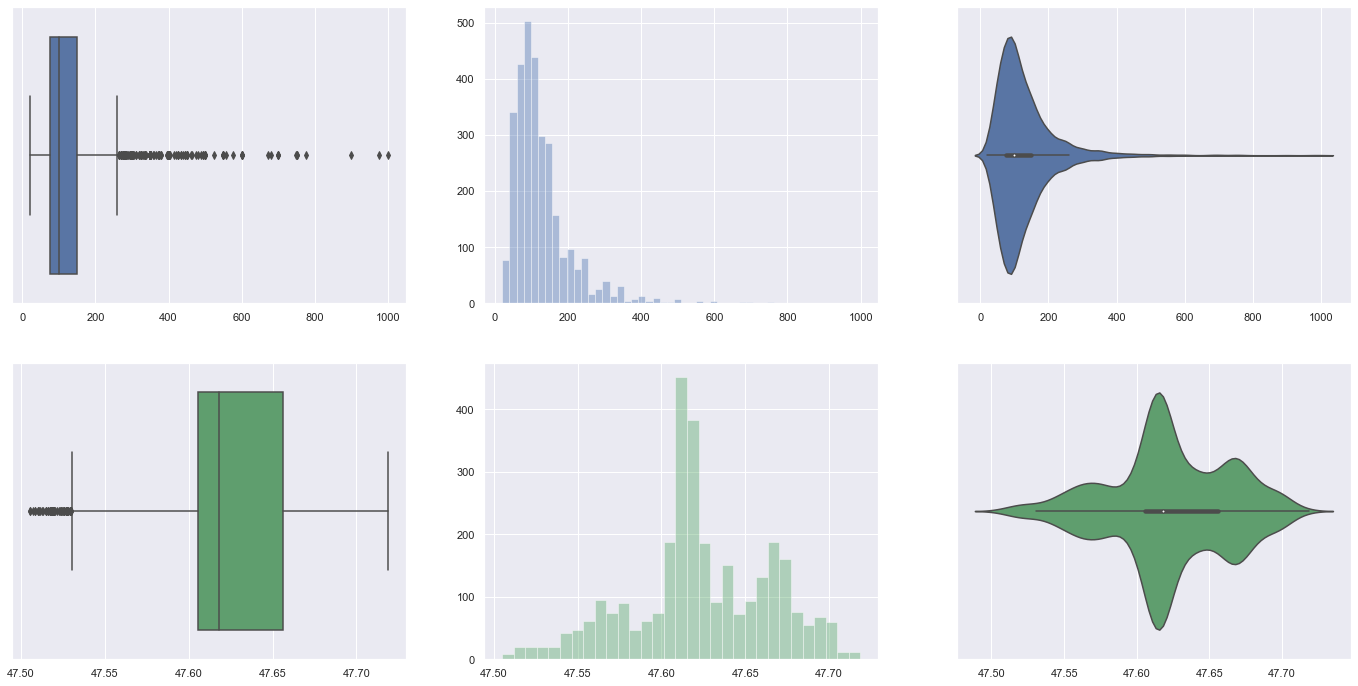

In [16]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for Price
sb.boxplot(price_train, orient = "h", ax = axes[0,0])
sb.distplot(price_train, kde = False, ax = axes[0,1])
sb.violinplot(price_train, ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(location_train, orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(location_train, kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(location_train, ax = axes[1,2], color = 'g')

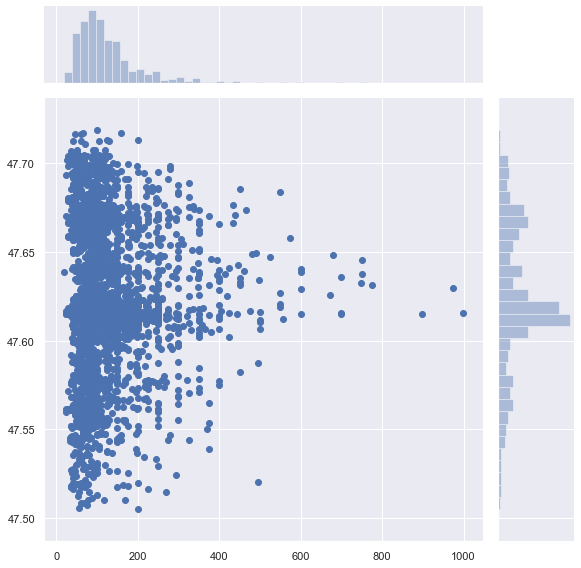

In [17]:
# Jointplot of Total Train against HP Train
sb.jointplot(price_train, location_train, height = 8)

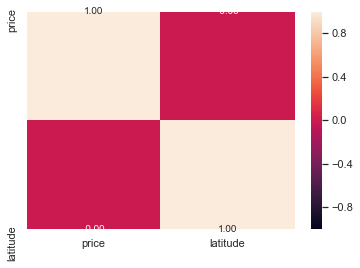

In [18]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([price_train, location_train.reindex(index=price_train.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [19]:
location.head()


,latitude
0,47.636289
1,47.639123
2,47.629724
3,47.638473
4,47.632918


In [20]:
data['total_accuracy_review_score'] = data['review_scores_rating'] * data['review_scores_accuracy']

In [21]:
data['total_accuracy_review_score'].head()

0    950.0
1    960.0
2    970.0
3      0.0
4    828.0
Name: total_accuracy_review_score, dtype: float64

In [22]:
data.to_csv(r'File Name.csv', index = False)

In [23]:
# Linear regression checking beween total_accuracy_review and price

In [24]:
price = pd.DataFrame(data['price'])  # Response
accuratereviews = pd.DataFrame(data['total_accuracy_review_score'])        # Predictor 

In [25]:
# Train Set : 600 samples
price_train = pd.DataFrame(price[:3055])
accuratereviews_train = pd.DataFrame(accuratereviews[:3055])

# Test Set : 200 samples
price_test = pd.DataFrame(price[-763:])
accuratereviews_test = pd.DataFrame(accuratereviews[-763:])

# Check the sample sizes
print("Train Set :", price_train.shape, accuratereviews_train.shape)
print("Test Set  :", price_test.shape, accuratereviews_test.shape)

Train Set : (3055, 1) (3055, 1)
Test Set  : (763, 1) (763, 1)


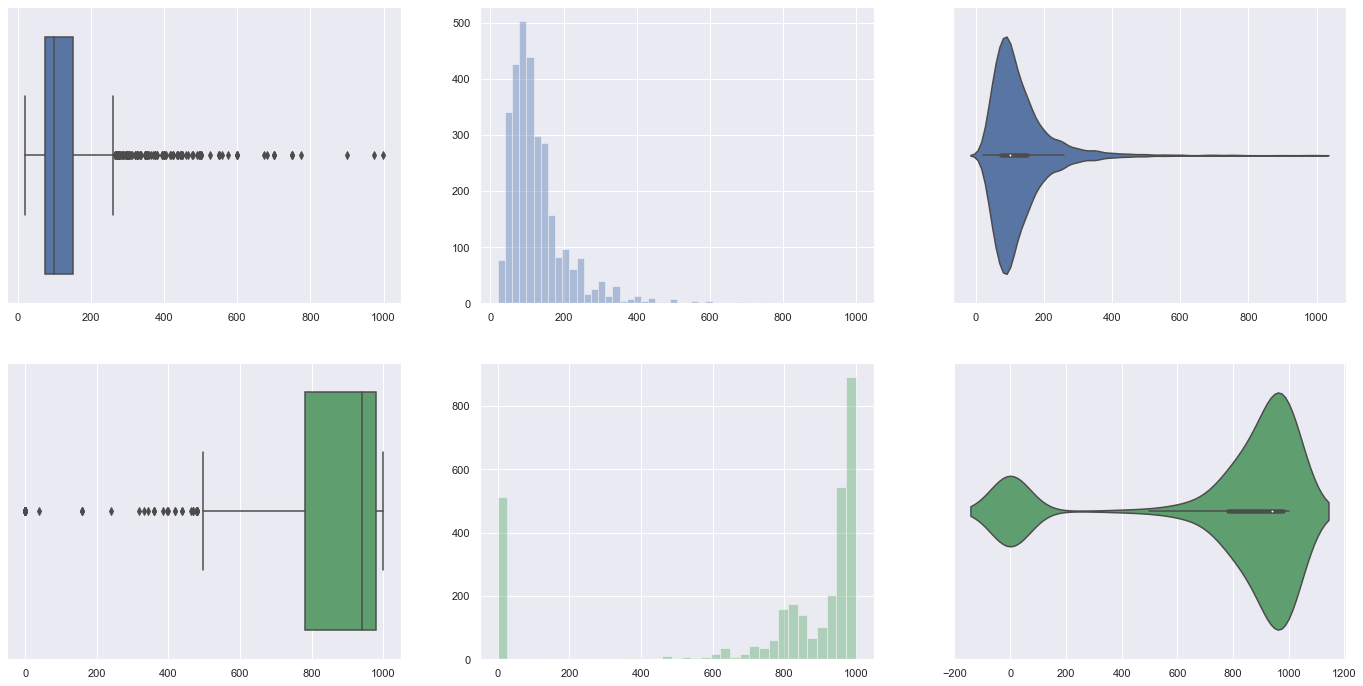

In [26]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(price_train, orient = "h", ax = axes[0,0])
sb.distplot(price_train, kde = False, ax = axes[0,1])
sb.violinplot(price_train, ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(accuratereviews_train, orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(accuratereviews_train, kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(accuratereviews_train, ax = axes[1,2], color = 'g')

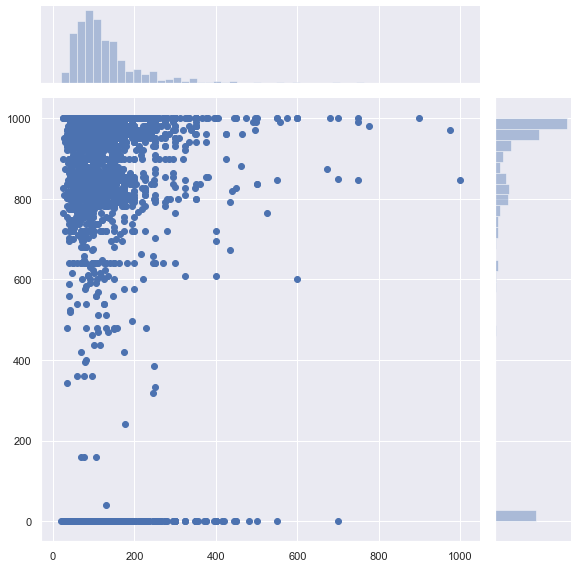

In [27]:
# Jointplot of Total Train against HP Train
sb.jointplot(price_train, accuratereviews_train, height = 8)

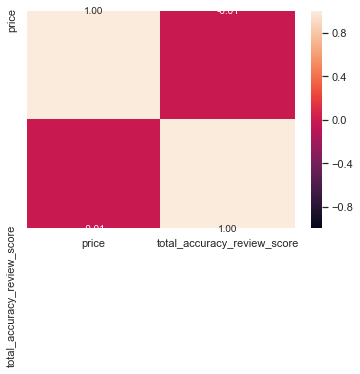

In [28]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([price_train, accuratereviews_train.reindex(index=price_train.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [31]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(accuratereviews_train, price_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(accuratereviews_train, price_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Classification Accuracy 	: 0.0


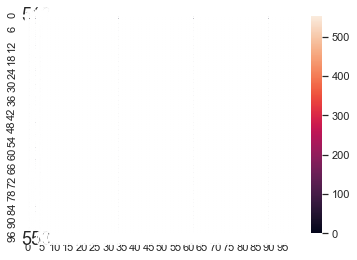

In [33]:
# Predict the Response corresponding to Predictors
accuratereviews_train_pred = dectree.predict(price_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(price_train, accuratereviews_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(accuratereviews_train, accuratereviews_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [34]:
# Linear regression checking beween review and price

In [35]:
price = pd.DataFrame(data['price'])  # Response
reviews = pd.DataFrame(data['number_of_reviews'])        # Predictor 

In [36]:
# Train Set : 600 samples
price_train = pd.DataFrame(price[:3055])
reviews_train = pd.DataFrame(reviews[:3055])

# Test Set : 200 samples
price_test = pd.DataFrame(price[-763:])
reviews_test = pd.DataFrame(reviews[-763:])

# Check the sample sizes
print("Train Set :", price_train.shape, reviews_train.shape)
print("Test Set  :", price_test.shape, reviews_test.shape)

Train Set : (3055, 1) (3055, 1)
Test Set  : (763, 1) (763, 1)


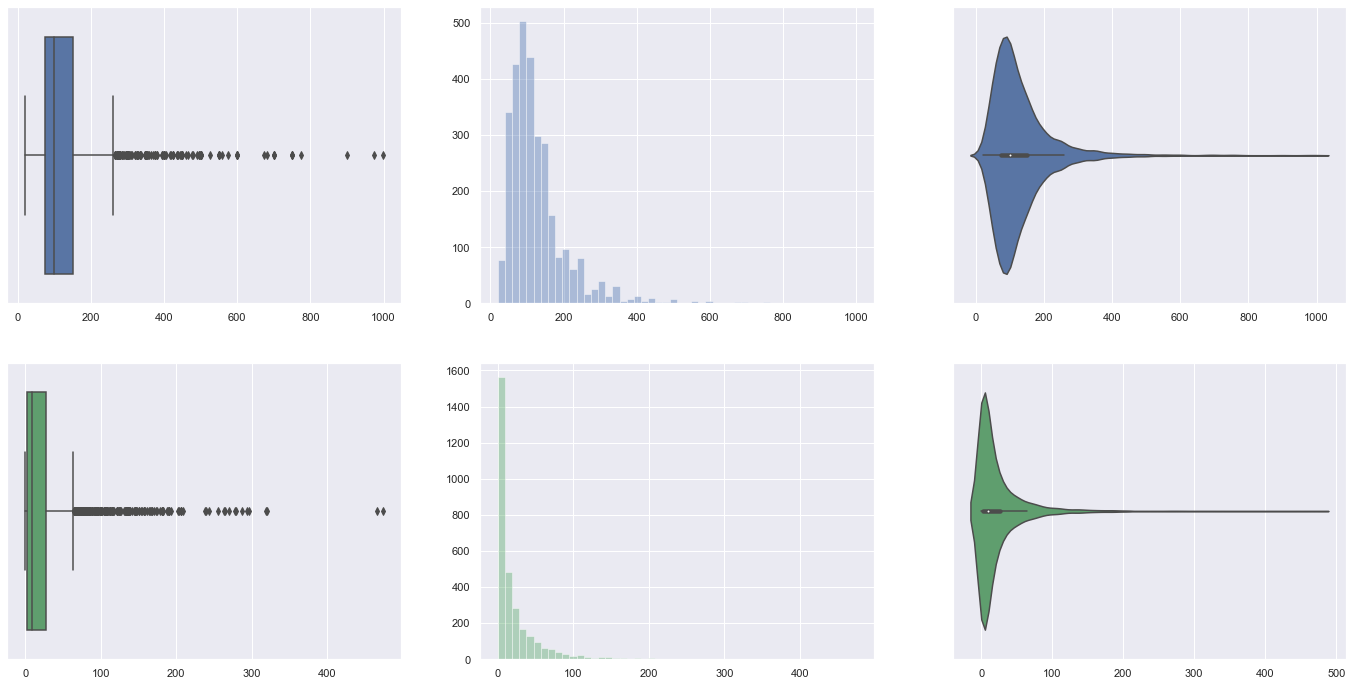

In [37]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for Price
sb.boxplot(price_train, orient = "h", ax = axes[0,0])
sb.distplot(price_train, kde = False, ax = axes[0,1])
sb.violinplot(price_train, ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(reviews_train, orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(reviews_train, kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(reviews_train, ax = axes[1,2], color = 'g')

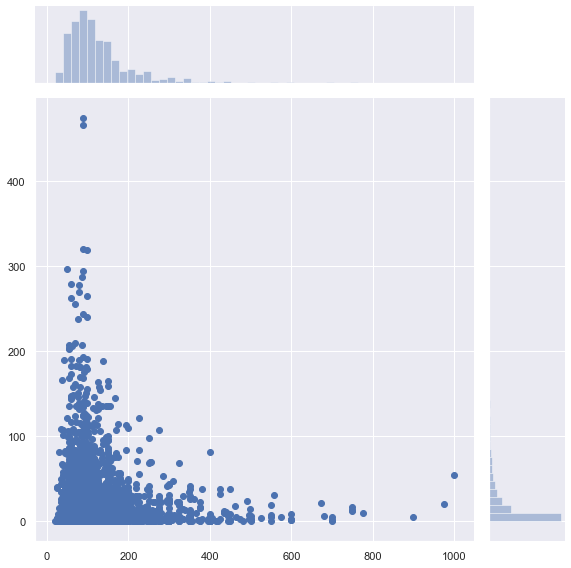

In [38]:
# Jointplot of Total Train against HP Train
sb.jointplot(price_train, reviews_train, height = 8)

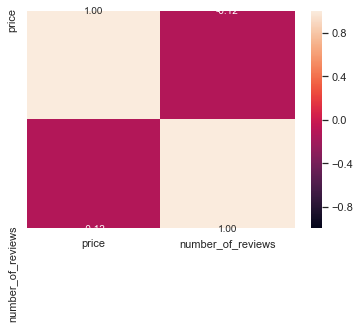

In [39]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([price_train, reviews_train.reindex(index=price_train.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [40]:
# Linear regression checking beween host listing and price

In [41]:
price = pd.DataFrame(data['price'])  # Response
listingcount = pd.DataFrame(data['calculated_host_listings_count'])        # Predictor 

In [42]:
# Train Set : 600 samples
price_train = pd.DataFrame(price[:3055])
listingcount_train = pd.DataFrame(listingcount[:3055])

# Test Set : 200 samples
price_test = pd.DataFrame(price[-763:])
listingcount_test = pd.DataFrame(listingcount[-763:])

# Check the sample sizes
print("Train Set :", price_train.shape, listingcount_train.shape)
print("Test Set  :", price_test.shape, listingcount_test.shape)

Train Set : (3055, 1) (3055, 1)
Test Set  : (763, 1) (763, 1)


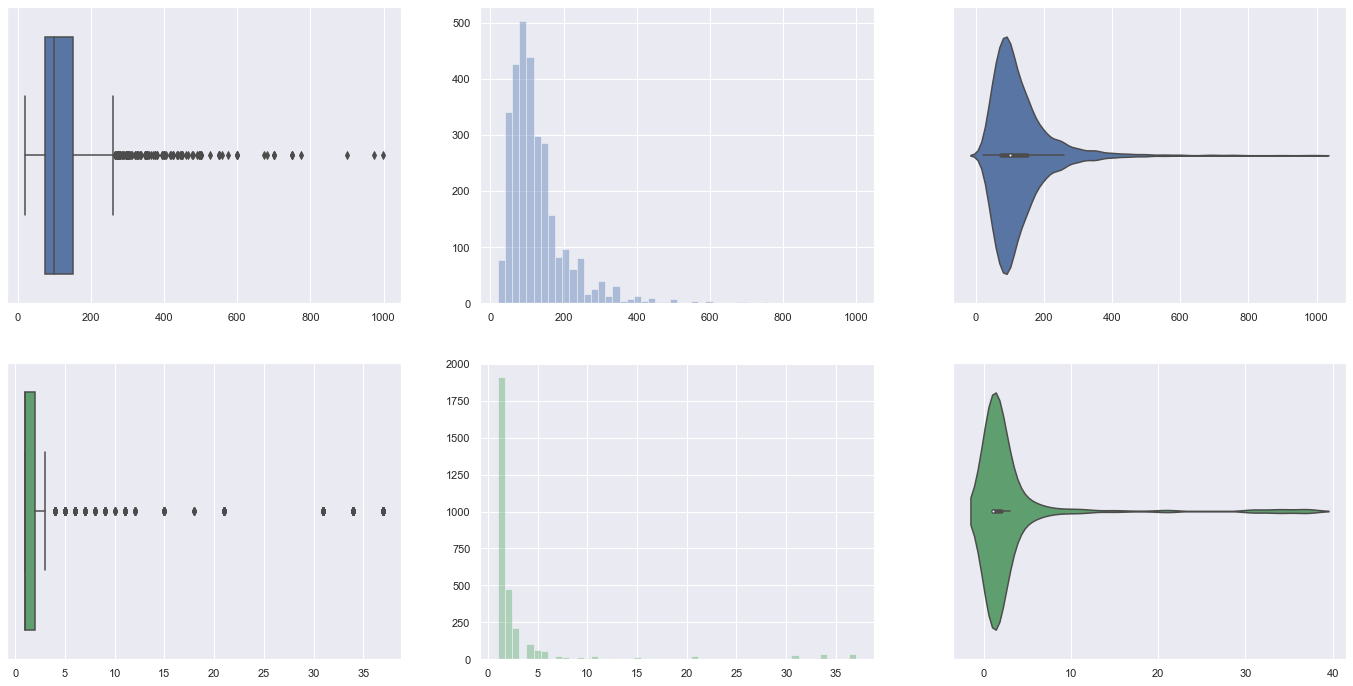

In [43]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for Price
sb.boxplot(price_train, orient = "h", ax = axes[0,0])
sb.distplot(price_train, kde = False, ax = axes[0,1])
sb.violinplot(price_train, ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(listingcount_train, orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(listingcount_train, kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(listingcount_train, ax = axes[1,2], color = 'g')

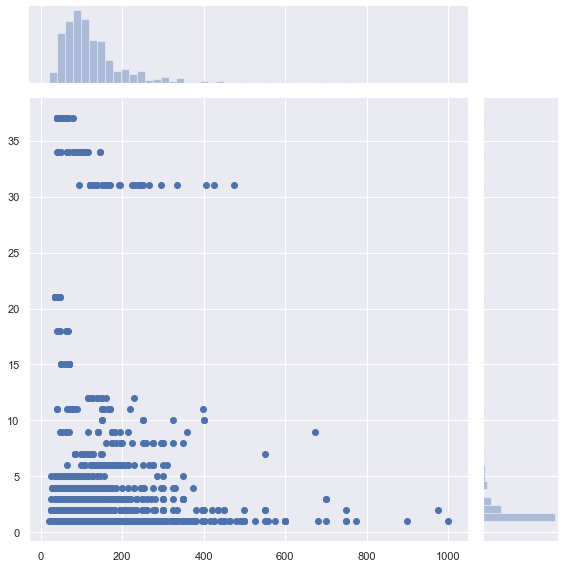

In [44]:
# Jointplot of Total Train against HP Train
sb.jointplot(price_train, listingcount_train, height = 8)

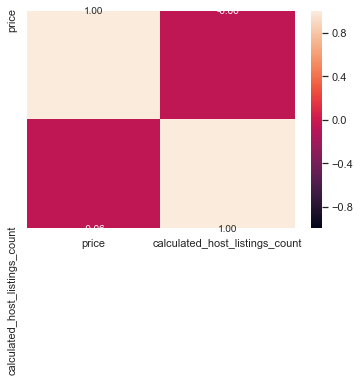

In [45]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([price_train, listingcount_train.reindex(index=price_train.index)], sort = False, axis = 1)

# Calculate the correlation between the two columns/variables
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


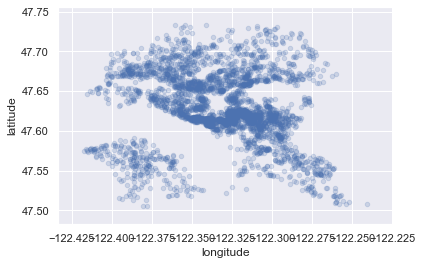

In [46]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.savefig('map1.png')

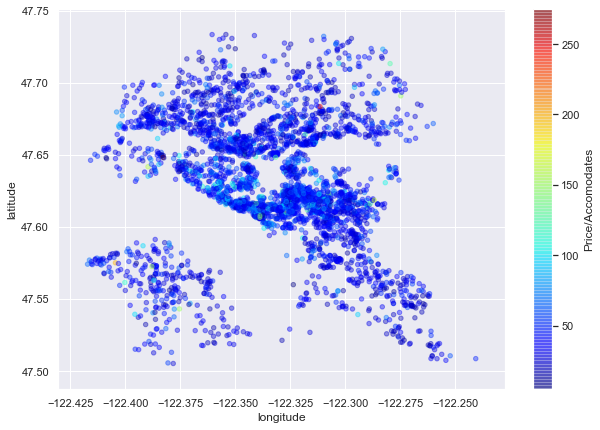

In [47]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="Price/Accomodates", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [48]:
corr_matrix = data.corr()
corr_matrix["Price/Accomodates"].sort_values(ascending=False)

Price/Accomodates                 1.000000
price                             0.450056
weekly_price                      0.130275
security_deposit                  0.061220
monthly_price                     0.059170
availability_365                  0.030469
host_id                           0.028344
bathrooms                         0.024406
id                                0.018139
cleaning_fee                      0.017096
availability_30                   0.013015
square_feet                       0.002689
availability_60                   0.000509
minimum_nights                    0.000373
availability_90                  -0.002546
host_total_listings_count        -0.003202
host_listings_count              -0.003202
maximum_nights                   -0.003295
extra_people                     -0.015755
latitude                         -0.018131
calculated_host_listings_count   -0.043426
longitude                        -0.045830
bedrooms                         -0.069800
guests_incl

In [49]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price                             1.000000
accommodates                      0.652218
bedrooms                          0.626891
beds                              0.588455
cleaning_fee                      0.576423
square_feet                       0.531752
bathrooms                         0.512133
Price/Accomodates                 0.450056
weekly_price                      0.394486
guests_included                   0.392875
security_deposit                  0.333579
monthly_price                     0.275787
extra_people                      0.127961
host_total_listings_count         0.093869
host_listings_count               0.093869
minimum_nights                    0.017297
maximum_nights                   -0.003336
latitude                         -0.008904
total_accuracy_review_score      -0.013309
review_scores_location           -0.014298
availability_365                 -0.015550
review_scores_cleanliness        -0.016989
review_scores_rating             -0.019938
review_scor